# Udacity DAND Project 2 - Investigate a dataset

## Mark Bannister

### Introduction

The RMS *Titanic* was a British passenger ship that sank on 15 April 1912. The ship was on its maiden voyage, travelling from Southampton, UK to New York, USA, when it struck an iceberg in the northern Atlantic Ocean. Of the *Titanic*'s 2,224 passengers and crew aboard, more than 1,500 died.

A key reason cited for the relatively large loss of life was the lack of adequate lifeboat provision - the *Titanic* only carried enough lifeboats for 1,178 people (one third of her total capacity) [[1]](https://en.wikipedia.org/wiki/RMS_Titanic).

This investigation will examine a sample of data from 891 of the passengers and crew on board to determine whether there were any factors that made passengers more likely to survive. In particular, it will focus on passenger sex, class, age and the number of family members on board. Statistical tests will be performed to determine whether any of the factors identified were indeed significant or not.

### Hypotheses

#### *1. Was there a significant relationship between passenger sex and survival?*

$H_0$: The population distribution of male and female survivors is consistent with the overall population distribution of male and female passengers

$H_1$: The population distribution of male and female survivors is not consistent with the overall population distribution of male and female passengers

A chi-squared goodness-of-fit test will be used to determine whether the observed frequencies of male and female survivors differ significantly from expected frequencies based on the overall population distribution.

#### *2. Was there a significant relationship between passenger class and survival?*

$H_0$: The population distribution of first, second and third class survivors is consistent with the overall population distribution of first, second and third class passengers

$H_1$: The population distribution of first, second and third class survivors is not consistent with the overall population distribution of first, second and third class passengers

A chi-squared goodness-of-fit test will be used to determine whether the observed frequencies of first, second and third class survivors differ significantly from expected frequencies based on the overall population distribution.

#### *3. Was there a significant relationship between passenger age and survival?*

$H_0$: The population mean age of survivors is equal to the overall population mean age of passengers

$H_1$: The population mean age of survivors is not equal to the overall population mean age of passengers

A one-sample t-test will be used to determine whether the population mean age of survivors differs significantly from the overall population mean age of passengers.

#### *4. Were parents more likely to survive than children?*

$H_0$: The population distribution of parent and child survivors is consistent with the overall population distribution of parent and child passengers

$H_1$: The population distribution of parent and child survivors is not consistent with the overall population distribution of parent and child passengers

A chi-squared goodness-of-fit test will be used to determine whether the observed frequencies of parent and child survivors differ significantly from expected frequencies based on the overall population distribution.

#### *5. Were passengers more likely to survive if they had a family member on board?*

$H_0$: The population distribution of survivors with and without family members on board is consistent with the overall population distribution of passengers with and without family members on board

$H_1$: The population distribution of survivors with and without family members on board is not consistent with the overall population distribution of passengers with and without family members on board

A chi-squared goodness-of-fit test will be used to determine whether the observed frequencies of survivors with and without family members on board differ significantly from expected frequencies based on the overall population distribution.


### Methodology

#### *Data gathering*

The sample data, consisting of the details of 891 *Titanic* passengers, will be imported into a Pandas dataframe. The dataframe will then be cleaned using the .dropna() function in Pandas to remove all data for the 177 passengers that do not have a recorded age, leaving a sample of 714 passengers (i.e. representing 32.1% of the total passengers and crew on board at the time of the ship's sinking).

It is usually prudent to include as many observations as possible when testing the relationship between two variables. However, given that this investigation will be testing multiple variable relationships, in this instance it is preferable to remove the incomplete records to ensure a consistent dataset is used throughout. This will enable meaningful comparisons to be drawn between multiple conclusions (e.g. those based on passenger age and sex).  

It should be noted that there are also 687 passenger records that are missing cabin data, and a further two missing data regarding the passengers' point of embarkation. Given that neither variables are being explored during the course of this investigation, it is not necessary to remove the relevant passengers' details from the sample.

Once cleaned, the data will be used to gather summary statistics for the variables being investigated, and to create visualisations. Finally, each hypothesis will be tested on the basis described above, with the relevant null hypothesis being either accepted or rejected.

#### *Hypothesis testing*

**Chi-squared goodness-of-fit test**

A chi-squared goodness-of-fit test will be used to determine whether the observed distribution of categorical variables (e.g. passenger sex) by survival status differs significantly from the expected distribution based on the overall passenger population.

The test assumes the following:
* The samples have been chosen at random
* The sample observations are independent of each other
* The expected frequency of sample data in each variable category is at least 5

A test statistic and P-value will be calculated and the null hypothesis will be rejected if P < 0.05.

* The test statistic is a chi-square random variable ($\chi^2$) defined by the following equation:  

   $$
   \chi^2 = \sum  \frac{(x_i - E_i)^2}{E_i}
   $$

   where $x_i$ is the observed frequency count for the ith level of the categorical variable, and $E_i$ is the expected frequency count for the ith level of the categorical variable. The degrees of freedom used in this test are $(m - 1)(n - 1)$ where $m$ is the total number of categories in the dependent variable and $n$ is the total number of categories in the independent variable.
  
* The P-value is the probability of observing a sample statistic as extreme as the test statistic [[2]](http://stattrek.com/chi-square-test/goodness-of-fit.aspx?Tutorial=AP) [[3]](http://www.biostathandbook.com/chigof.html).

**One-sample t-test**

A one-sample t-test will be used to determine whether the population mean age of survivors differs significantly from the overall population mean age of passengers.

The test assumes the following:
* The samples have been chosen at random
* The characteristic is normally distributed in the underlying population
* The standard deviation of the underlying population is unknown

A test statistic and P-value will be calculated and the null hypothesis will be rejected if P < 0.05.

* The test statistic is a t-statistic ($t$) defined by the following equation:  

   $$
   t = \frac{\bar x - \mu_0}{s\space/\sqrt{n}}
   $$

   where $\bar x$ is the sample mean, $\mu_0$ is the population mean, $s$ is the population standard deviation and $n$ is the number of samples. The degrees of freedom used in this test are $n-1$.
  
* The P-value is the probability of observing a sample statistic as extreme as the test statistic [[4]](http://www.biostathandbook.com/onesamplettest.html).

### Results

#### *Importing data*

In [1]:
# Importing packages and setting plt and sns defaults

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set(color_codes=True)

In [2]:
filepath = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/'
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filepath + filename)

#### *Cleaning data*

In [3]:
# Previewing data

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Re-labelling passenger class using strings both for clarity and for later use with
# the Pandas .describe() function

titanic_df['Pclass'] = titanic_df['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})

In [5]:
# Removing passengers with missing ages (see 'Methodology' section above)

titanic_df_clean = titanic_df.dropna(subset = ['Age'])
titanic_df_clean.reset_index(drop=True, inplace=True)

In [6]:
# Confirming data is in desired format

titanic_df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Variable descriptions**:
- Survived: Survival (0 = No; 1 = Yes)
- Pclass: Passenger class (1st; 2nd; 3rd)
- Name: Name
- Sex: Sex
- Age: Age (years)
- SibSp: Number of siblings or spouses on board
- Parch: Number of parents or children on board
- Ticket: Ticket number
- Fare: Passenger fare (assumed to be USD)
- Cabin: Cabin
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Special notes:

- Pclass is a proxy for socio-economic status (SES)
  - 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

- Age is in years; fractional if less than one (1)
  - If the age is estimated, it is in the form xx.5 

- With respect to the family relation variables (i.e. SibSp and Parch) some relations were ignored. The following are the definitions used:
  - Sibling:  Brother, sister, stepbrother, or stepsister of passenger on board Titanic
  - Spouse:   Husband or wife of passenger on board Titanic (mistresses and fiances ignored)
  - Parent:   Mother or father of passenger on board Titanic
  - Child:    Son, daughter, stepson, or stepdaughter of passenger on board Titanic

- Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore Parch=0 for them. As well, some travelled with very close friends or neighbours in a village, however, the definitions do not support such relations. [[5]](https://www.kaggle.com/c/titanic/data)

#### *Descriptive statistics*

In [7]:
# Function to produce table of descriptive statistics for selected fields with 
# side-by-side comparison for easier comprehension

def create_table(df,fields):
    i = 0
    survived_df = df[df['Survived']==1]
    died_df = df[df['Survived']==0]
    for field in fields:
        survived_column = pd.DataFrame(survived_df[field].describe())
        died_column = pd.DataFrame(died_df[field].describe())
        a = create_sub_table(survived_column,died_column)
        if i == 0:
            b, a = a, 0
        else:
            b = b.merge(a,left_index=True,right_index=True,copy=False)
        i = 1
    return b

# Helper function to create the column pairs for each field

def create_sub_table(column1,column2):
    return column1.merge(column2,left_index=True,right_index=True,suffixes=('_Survived', '_Died'))

**Table 1: Descriptive statistics for passenger age, fare, sibling/spouse and parent/child variables**

In [8]:
create_table(titanic_df_clean,['Age','Fare','SibSp','Parch'])

,Age_Survived,Age_Died,Fare_Survived,Fare_Died,SibSp_Survived,SibSp_Died,Parch_Survived,Parch_Died
count,290.000000,424.000000,290.000000,424.000000,290.000000,424.000000,290.000000,424.000000
mean,28.343690,30.626179,51.843205,22.965456,0.493103,0.525943,0.527586,0.365566
std,14.950952,14.172110,70.458776,31.448825,0.731132,1.044760,0.807147,0.878341
min,0.420000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,21.000000,13.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,28.000000,28.000000,26.250000,11.887500,0.000000,0.000000,0.000000,0.000000
75%,36.000000,39.000000,66.200000,26.550000,1.000000,1.000000,1.000000,0.000000
max,80.000000,74.000000,512.329200,263.000000,4.000000,5.000000,5.000000,6.000000


The above table shows descriptive statistics for passenger age, fare, number of siblings/spouses on board, and number of parents/children on board. This highlights a number of conclusions, including:
* Of the 714 passengers in this sample, 290 survived, equivalent to an overall survival rate of 40.6%
* The average age of survivors was slightly younger than that of non-survivors, at 28.3 vs. 30.6. However, the median age was the same in each case. These findings may suggest that children were prioritised during the evacuation, leading to a lower mean age among survivors
  + The oldest survivor was 80 years old, while the youngest was less than 1
  + The oldest victim was 74 years old, while the youngest was 1
* The average fare paid by survivors was \$51.84, while among non-survivors this was only \$22.97. This may suggest that passengers in higher classes were more likely to survive, perhaps due to closer proximity to the deck and/or the lifeboats
* The average number of siblings or spouses on board was similar for both survivors and non-survivors, at 0.49 and 0.53, respectively
* The average number of parents or children on board was slightly higher for survivors at 0.53 vs. 0.37 for non-survivors. A possible explanation might be that women and children were prioritised when filling the lifeboats, resulting in a disproportionately high number of family units among the survivors

**Table 2: Descriptive statistics for passenger sex and class**

In [9]:
create_table(titanic_df_clean,['Sex','Pclass'])

,Sex_Survived,Sex_Died,Pclass_Survived,Pclass_Died
count,290,424,290,424
unique,2,2,3,3
top,female,male,1st,3rd
freq,197,360,122,270


The above table shows descriptive statistics for passenger sex and class. This suggests that:
* Women made up 67.9% of survivors. As stated above, this may have been caused by a policy of prioritising women (and children) during the evacuation
* First-class passengers represented 42.1% of survivors, while third-class passengers constituted 63.7% of the victims. As stated above, it may have been the case that first-class passengers were closer to the deck, and thus had easier access to the lifeboats, and/or were less likely to get trapped below deck as the ship sank

### Analysis and hypothesis testing

#### *Visualisation and analysis functions*

In [10]:
# Function to return totals for given field

def total_by_field(df,field):
    return df.groupby(field).count()['Survived']

# Function to return total survivors for given field

def survived_by_field(df,field):
    return df.groupby(field).sum()['Survived']

# Function to return total passengers died for given field

def died_by_field(df,field):
    return total_by_field(df,field) - survived_by_field(df,field)

In [11]:
# Function to return total survivor and victim counts for given field

def get_counts(df,field):
    Survived = survived_by_field(df,field)
    Died = died_by_field(df,field)
    return pd.concat([Survived, Died], axis=1,keys=['Survived','Died'])

In [12]:
# Function to return percentage outputs for stacked bar chart for given field

def get_percentages(df,field):
    return get_counts(df,field).div(total_by_field(df,field),axis=0) * 100

In [13]:
# Function to return x-coordinates for bars in stacked bar chart

def get_bottom(width,spacing,n):
    bottom = [spacing]
    for i in range(1,n):
        bottom.append(i * width + (i+1) * spacing)
    return np.array(bottom)

In [14]:
# Function to perform chi-squared goodness-of-fit test between given variable and survival

def chisquare_survival(df,field=None):
    if field:
        observed = get_counts(df,field)
    else:
        observed = df
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    grand_total = row_totals.sum()
    row_ratios = row_totals / grand_total
    expected = np.outer(row_ratios,col_totals)
    statistic, pvalue = stats.chisquare(f_obs=observed, f_exp=expected, axis=None)
    print "The chi-squared test statistic is " + str(statistic)
    print "The P-value is " + str(pvalue)

In [15]:
# Splitting the data into two sets based on survival status, and calculating totals

survived_df = titanic_df_clean[titanic_df_clean['Survived']==1]
died_df = titanic_df_clean[titanic_df_clean['Survived']==0]
survived_total = survived_df.count()['PassengerId']
died_total = died_df.count()['PassengerId']

#### *1. Was there a significant relationship between passenger sex and survival?*

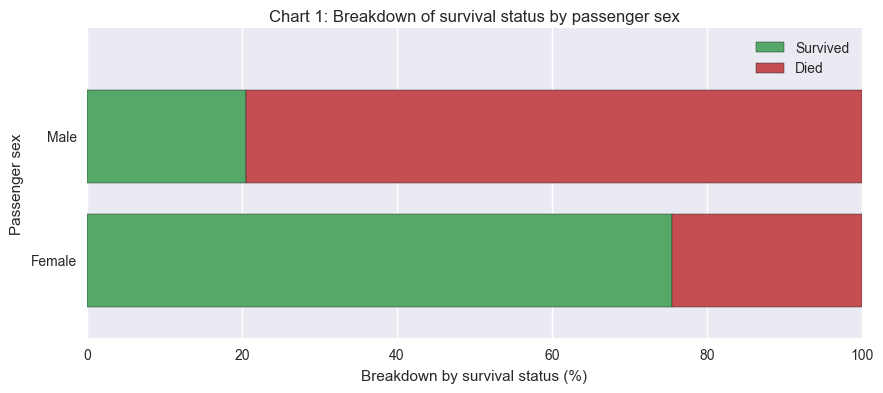

In [16]:
# Creating stacked bar chart of passenger survival status by sex

survived = get_percentages(titanic_df_clean,'Sex')['Survived']
died = get_percentages(titanic_df_clean,'Sex')['Died']
width = 0.3
spacing = 0.1
bottom = get_bottom(width,spacing,len(survived))
plt.figure(figsize=(10,4))
plt.barh(bottom, survived, width, color='g', label='Survived')
plt.barh(bottom, died, width, color='r', left=survived, label='Died')
plt.legend(loc='best')
plt.yticks((bottom + (width/2)),['Female','Male'])
plt.ylim(0,1)
plt.ylabel('Passenger sex')
plt.xlabel('Breakdown by survival status (%)')
plt.title('Chart 1: Breakdown of survival status by passenger sex')

The above chart displays the survival rates for both sexes among the passengers on board the *Titanic*. 75.5% of women on board survived, compared with only 20.5% of men. This supports the theory stated above that women may have been given priority when boarding the limited number of lifeboats.

In [17]:
chisquare_survival(titanic_df_clean,'Sex')

The chi-squared test statistic is 207.297776057
The P-value is 1.11731937866e-44


By calculating the chi-squared test statistic and P-value for this data, it can be seen that P < 0.05. The null hypothesis is therefore rejected in favour of the alternative: the population distribution of male and female survivors is not consistent with the overall population distribution of male and female passengers. In other words, the observed distribution of survivors in terms of sex is extremely unlikely to have occurred by chance.

#### *2. Was there a significant relationship between passenger class and survival?*

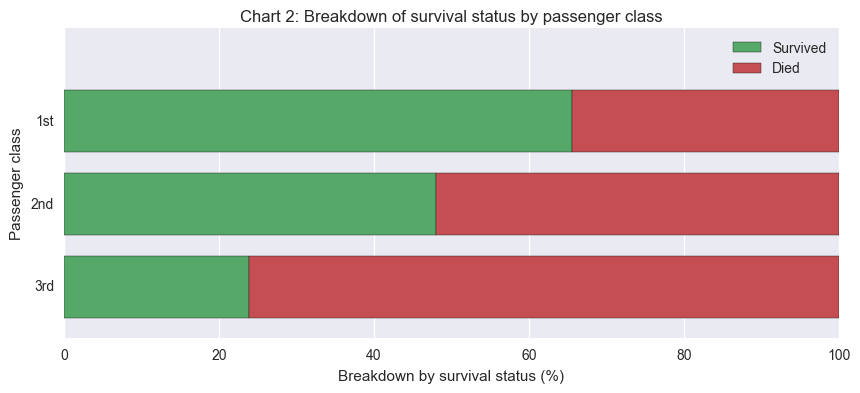

In [18]:
# Creating stacked bar chart of passenger survival status by class

survived = get_percentages(titanic_df_clean,'Pclass')['Survived'][::-1]
died = get_percentages(titanic_df_clean,'Pclass')['Died'][::-1]
width = 0.3
spacing = 0.1
bottom = get_bottom(width,spacing,len(survived))
plt.figure(figsize=(10,4))
plt.barh(bottom, survived, width, color='g', label='Survived')
plt.barh(bottom, died, width, color='r', left=survived, label='Died')
plt.legend(loc='best')
plt.yticks((bottom + (width/2)),['3rd','2nd','1st'])
plt.ylim(0,1.5)
plt.ylabel('Passenger class')
plt.xlabel('Breakdown by survival status (%)')
plt.title('Chart 2: Breakdown of survival status by passenger class')

Chart 2 shows the survival rates for passengers in each cabin class. It can be observed that 65.6% of first-class passengers survived, while 48.0% of second-class passengers and 23.9% of third-class passengers survived. The three classes constituted 26.1%, 24.2% and 49.7% of total passengers, respectively. However, they represented 42.1%, 28.6% and 29.3% of the survivors (respectively).

In [19]:
chisquare_survival(titanic_df_clean,'Pclass')

The chi-squared test statistic is 92.9014172114
The P-value is 1.65011138572e-18


The chi-squared test statistic and P-value calculated using this data shows that P < 0.05. The null hypothesis is therefore rejected in favour of the alternative: the population distribution of first, second and third class survivors is not consistent with the overall population distribution of first, second and third class passengers. 

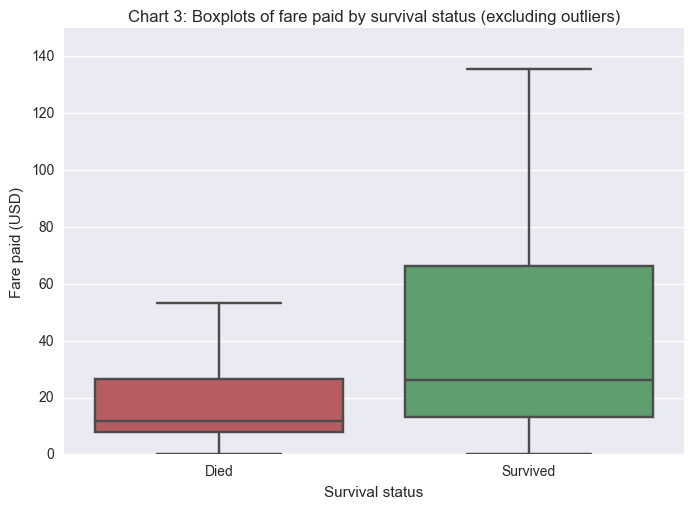

In [20]:
# Creating boxplots of fare paid by passenger survival status

sns.boxplot(x='Survived',y='Fare',data=titanic_df_clean,fliersize=0,palette=['r','g'])
plt.xticks([0,1],['Died','Survived'])
plt.ylim(0,150)
plt.xlabel('Survival status')
plt.ylabel('Fare paid (USD)')
plt.title("Chart 3: Boxplots of fare paid by survival status (excluding outliers)")

The above chart further illustrates the link between passenger class (and by proxy social status) and survival. While some high paying passengers died, those paying the most survived. That doesn't necessarily suggest an explicit link between fare paid and survival; rather, an implicit link has already been demonstrated by the likely existence of a relationship between passenger class and survival, and the fact that first and second-class cabins cost more than third-class.  

As stated previously, one explanation might be that first-class cabins were located nearer the lifeboats.

#### *3. Was there a significant relationship between passenger age and survival?*

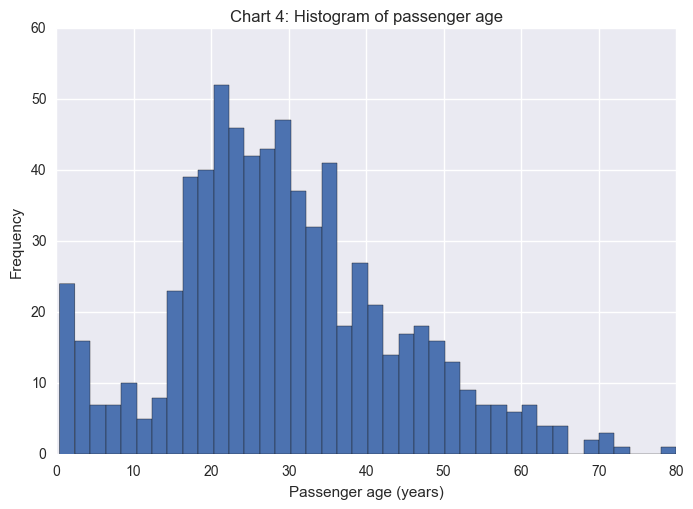

In [21]:
# Creating histogram of passenger age

titanic_df_clean['Age'].hist(bins=40,color='b')
plt.xlabel("Passenger age (years)")
plt.ylabel("Frequency")
plt.title("Chart 4: Histogram of passenger age")

Chart 4 shows the distribution of passenger ages. The distribution is positively skewed, but it approximates a normal distribution closely enough to minimise errors when performing a t-test on a sample. The mode interval is 20-22.5 years.

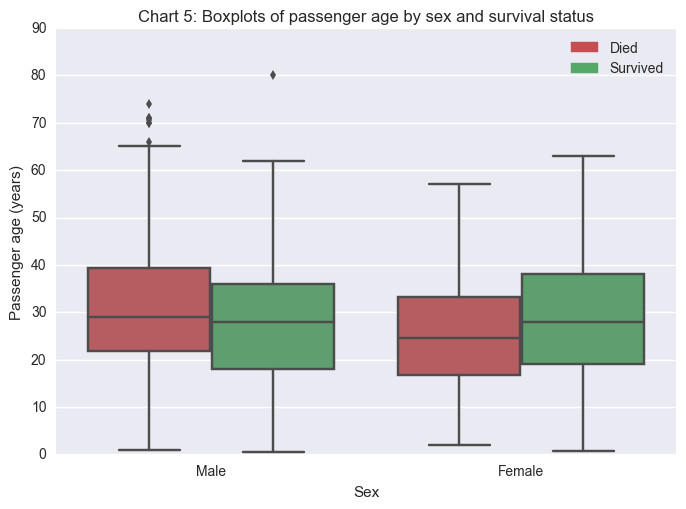

In [22]:
# Creating boxplots of passenger age by sex and survival status

sns.boxplot(x='Sex',y='Age',hue='Survived',data=titanic_df_clean,palette=['r','g'])
red_patch = mpatches.Patch(color='r', label='Died')
green_patch = mpatches.Patch(color='g', label='Survived')
plt.legend(handles=[red_patch,green_patch])
plt.xticks([0,1],['Male','Female'])
plt.ylim(0,90)
plt.xlabel('Sex')
plt.ylabel('Passenger age (years)')
plt.title("Chart 5: Boxplots of passenger age by sex and survival status")

Chart 5 shows that the interquartile range of survivors' and victims' ages was similar for both sexes, though female victims tended to be younger than female survivors, while male victims tended to be older than male survivors.  

The mean age of male survivors was 27.3 years, vs. 31.6 for male victims. The mean female survivor was 28.8 years old, vs. 25.0 for female victims. The mean age of passengers was 29.7 years, while the mean age of survivors was 28.3. While this appears to support the suggestion that a policy of 'women and children first' brought the average age of survivors down, a t-test will be performed to determine the significance of the difference between means.

In [23]:
survivor_ages = survived_df['Age']
population_mean_age = titanic_df_clean.mean()['Age']
statistic, pvalue = stats.ttest_1samp(a=survivor_ages, popmean=population_mean_age)
print "The t statistic is " + str(statistic)
print "The P-value is " + str(pvalue)

The t statistic is -1.54385533373
The P-value is 0.123717651529


The calculated t statistic shows that P > 0.05. Therefore the null hypothesis is retained: the population mean age of survivors is equal to the overall population mean age of passengers. Age was not likely a significant factor of survival.

#### *4. Were parents more likely to survive than children?*

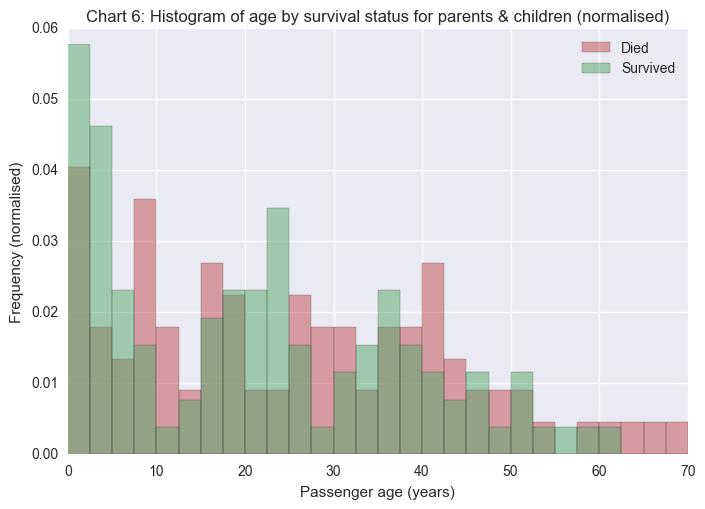

In [24]:
# Creating histogram of passenger ages for those with either parents or children onboard

parch_died = died_df[died_df['Parch']>0]
parch_survived = survived_df[survived_df['Parch']>0]
parch_died['Age'].hist(bins=28,range=(0,70),normed=True,alpha=0.5,label='Died',color='r')
parch_survived['Age'].hist(bins=28,range=(0,70),normed=True,alpha=0.5,label='Survived',color='g')
plt.legend(loc='best')
plt.xlabel("Passenger age (years)")
plt.ylabel("Frequency (normalised)")
plt.title("Chart 6: Histogram of age by survival status for parents & children (normalised)")

Chart 6 shows the normalised frequency distribution of passenger ages for those passengers that had either a parent or child on board, split into survivors and victims. The chart suggests that the youngest children (< 7.5 years) and the youngest parents (17.5-25 years) were more likely to survive, while older children, older parents and (presumably) grandparents were more likely to die.

By making the crude assumption that any passenger over 18 years old with parents or children on board was a parent, while any 18 was a child, a chi-squared goodness-of-fit test can be performed to determine whether the distribution of parents and children among the survivors diverged significantly from the overall population.

In [25]:
# Creating group of parent/child survivors and victims for use with chi-squared function

parent_survived = parch_survived[parch_survived['Age']>=18].count()['PassengerId']
child_survived = parch_survived[parch_survived['Age']<18].count()['PassengerId']
parent_died = parch_died[parch_died['Age']>=18].count()['PassengerId']
child_died = parch_died[parch_died['Age']<18].count()['PassengerId']

groupby_parch = pd.DataFrame([[parent_survived,parent_died],
                               [child_survived, child_died]],
                                index=['Parent','Child'],columns=['Survived','Died'])

In [26]:
chisquare_survival(groupby_parch)

The chi-squared test statistic is 0.156571220212
The P-value is 0.984275430275


From the chi-squared statistic and P-value calculated, it can be seen that P > 0.05. Therefore the null hypothesis is retained: the population distribution of parent and child survivors is consistent with the overall population distribution of parent and child passengers. In other words, the result suggests that parents were no more likely to die than children.  

This appears to suggest that families were likely to stick together regardless of whether or not they were able to get on a lifeboat, though this cannot be confirmed without explicitly matching family groups among the data and repeating the analysis, which is beyond the scope of this investigation.

#### *5. Were passengers more likely to survive if they had a family member on board?*

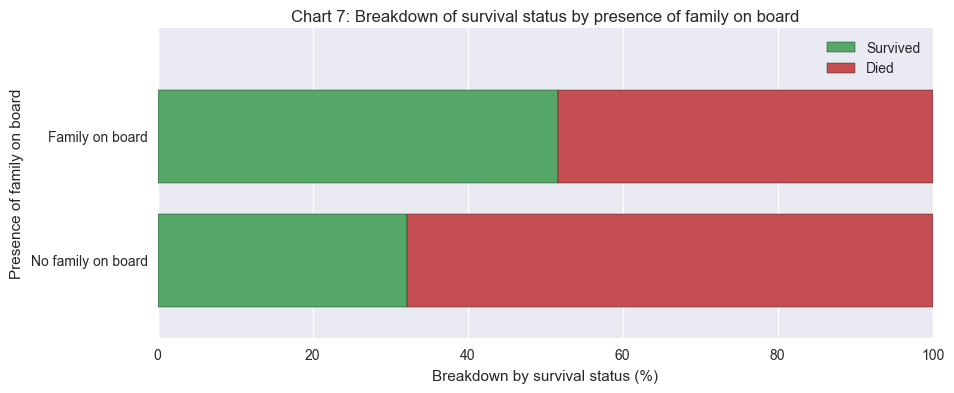

In [27]:
# Creating stacked bar chart of passenger survival by presence of family onboard

survived_no_fam = survived_df.groupby(['Parch','SibSp'],as_index=False).count()['PassengerId'][0]
died_no_fam = died_df.groupby(['Parch','SibSp'],as_index=False).count()['PassengerId'][0]
groupby_family = pd.DataFrame([[survived_no_fam,died_no_fam],
                               [(survived_total - survived_no_fam), (died_total - died_no_fam)]],
                                index=['No family','Family'],columns=['Survived','Died'])

percentages = groupby_family.div(groupby_family.sum(axis=1), axis=0) * 100

survived = percentages['Survived']
died = percentages['Died']

width = 0.3
spacing = 0.1
bottom = get_bottom(width,spacing,len(survived))
plt.figure(figsize=(10,4))
plt.barh(bottom, survived, width, color='g', label='Survived')
plt.barh(bottom, died, width, color='r', left=survived, label='Died')
plt.legend(loc='best')
plt.yticks((bottom + (width/2)),['No family on board','Family on board'])
plt.ylim(0,1)
plt.ylabel('Presence of family on board')
plt.xlabel('Breakdown by survival status (%)')
plt.title('Chart 7: Breakdown of survival status by presence of family on board')

Chart 7 shows the survival rates for passengers split between those with family on board (i.e. SibSp or Parch > 0), and those with no family on board. 51.6% of passengers with family on board survived, vs. 32.2% of passengers without.

In [28]:
chisquare_survival(groupby_family)

The chi-squared test statistic is 27.4683420065
The P-value is 4.69577655255e-06


The chi-squared test statistic and P-value demonstrate that P < 0.05. The null hypothesis is therefore rejected in favour of the alternative: the population distribution of survivors with and without family members on board is not consistent with the overall population distribution of passengers with and without family members on board.  

In other words, the data suggest that the presence of family members on board may have been a factor in a given passenger's survival.

### Conclusions

The investigation found that, of those analysed, the factors that were most likely to influence survival in the sinking of the *Titanic* were:
* Sex (specifically, being female)
* Passenger class (specifically, being in first-class)
* The presence of family members on board (specifically, travelling with family vs. without)

There could be several reasons for these findings. For example, it has been suggested that women and children were given priority access to the lifeboats, which would account for both the first and last factor. Further research has shown that this was indeed the protocol in place - *"the last lifeboat of all had room for forty-seven; 1,500 were still on board. The crew linked arms around it to keep back the desperate melee; and passed only women and children though."* [[6]](https://www.statslife.org.uk/history-of-stats-science/1587-titanic-did-women-and-children-first-cost-lives)

Reasons for the effect of passenger class on survival are less obvious. It has been suggested that lower class passengers were prevented from reaching the lifeboats. However, it has been reported that *"...the official investigations determined that no distinction between passenger classes was made during the loading of lifeboats. Women and children, without discrimination of class, were given preference."* [[7]](http://www.titanicstory.com/stats.htm)

It should be noted that these results are tentative, as they are based on a number of assumptions - for example, that the sample was chosen at random. It is conceivable that the results were not truly chosen at random, for a number of reasons, including:
* The methodology for compiling the original sample of 891 is not known. It is possible that the compiler believed that women were prioritised in the lifeboat queues and sought out records that confirmed this (sampling bias)
* 177 passenger records were removed from the original sample because they had no associated age data. It is possible that passengers that survived were more likely to have (accurate) age data recorded because they (or their descendants) were able to provide it after the event (exclusion bias)

Furthermore, there were limitations with the dataset, for example in the way that it reported family relationships. Siblings and spouses were grouped together and reported as a number, as were parents and children, rather than explicitly linking family members with one another. The latter could likely be achieved manually, for instance by identifying individuals with shared surnames and shared 'SibSp' and 'Parch' properties, but that is beyond the scope of the present investigation.

To investigate these findings further, additional analysis could be undertaken, for example, to determine whether families were more likely to survive by staying together or splitting up. It may also be interesting to explore the distribution of survivors by sex and passenger class further, and thereby determine what proportion of the survivors in each class were women (and children).

### Footnotes

1: https://en.wikipedia.org/wiki/RMS_Titanic  
2: http://stattrek.com/chi-square-test/goodness-of-fit.aspx?Tutorial=AP  
3: http://www.biostathandbook.com/chigof.html  
4: http://www.biostathandbook.com/onesamplettest.html  
5: https://www.kaggle.com/c/titanic/data  
6: https://www.statslife.org.uk/history-of-stats-science/1587-titanic-did-women-and-children-first-cost-lives  
7: http://www.titanicstory.com/stats.htm